In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rc('xtick', labelsize=40)
matplotlib.rc('ytick', labelsize=40)
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
ts = pd.read_csv("stock_price.csv")
ts["ds"] = pd.to_datetime(ts["ds"])
print(ts.shape)
ts.head()

(204, 2)


,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


Text(0.5, 1.0, 'Stock Price')

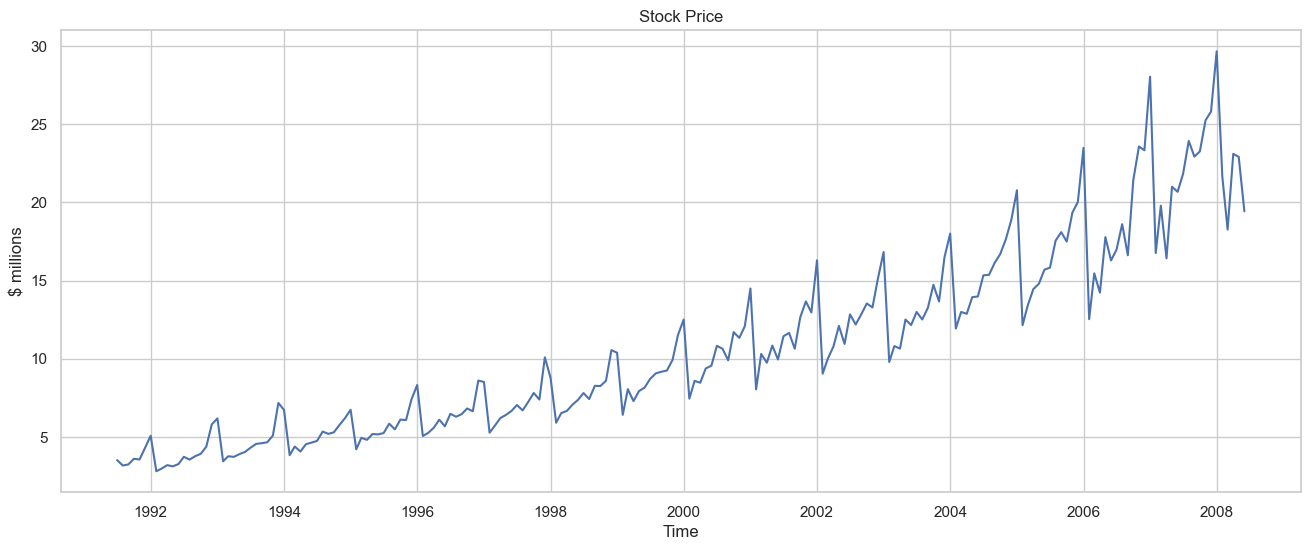

In [2]:
#Setting the size of the plot
plt.figure(figsize=(16, 6))
plt.plot(ts["ds"], ts["y"])
plt.xlabel("Time")
plt.ylabel("$ millions")
plt.title("Stock Price")

In [3]:
#Stacked Line Chart 
ts["year"] = ts["ds"].dt.year
ts["month"] = ts["ds"].dt.strftime('%b')
ts.head()

,ds,y,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov


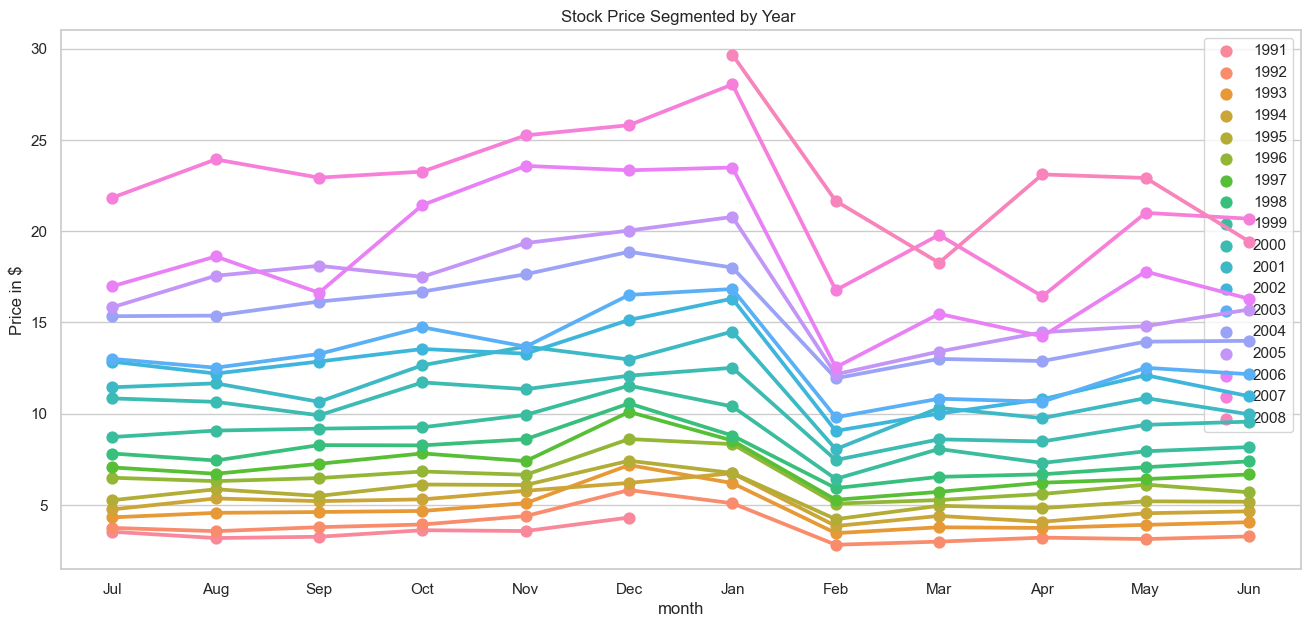

In [6]:
#Setting the size of the plot
plt.figure(figsize=(16, 7))
sns.pointplot(x="month", y="y", hue="year", data=ts, x_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("month")
plt.ylabel("Price in $")
plt.title("Stock Price Segmented by Year ")
plt.legend(loc='upper right')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Stock Price Segmented by Year ')

<Figure size 1600x700 with 0 Axes>

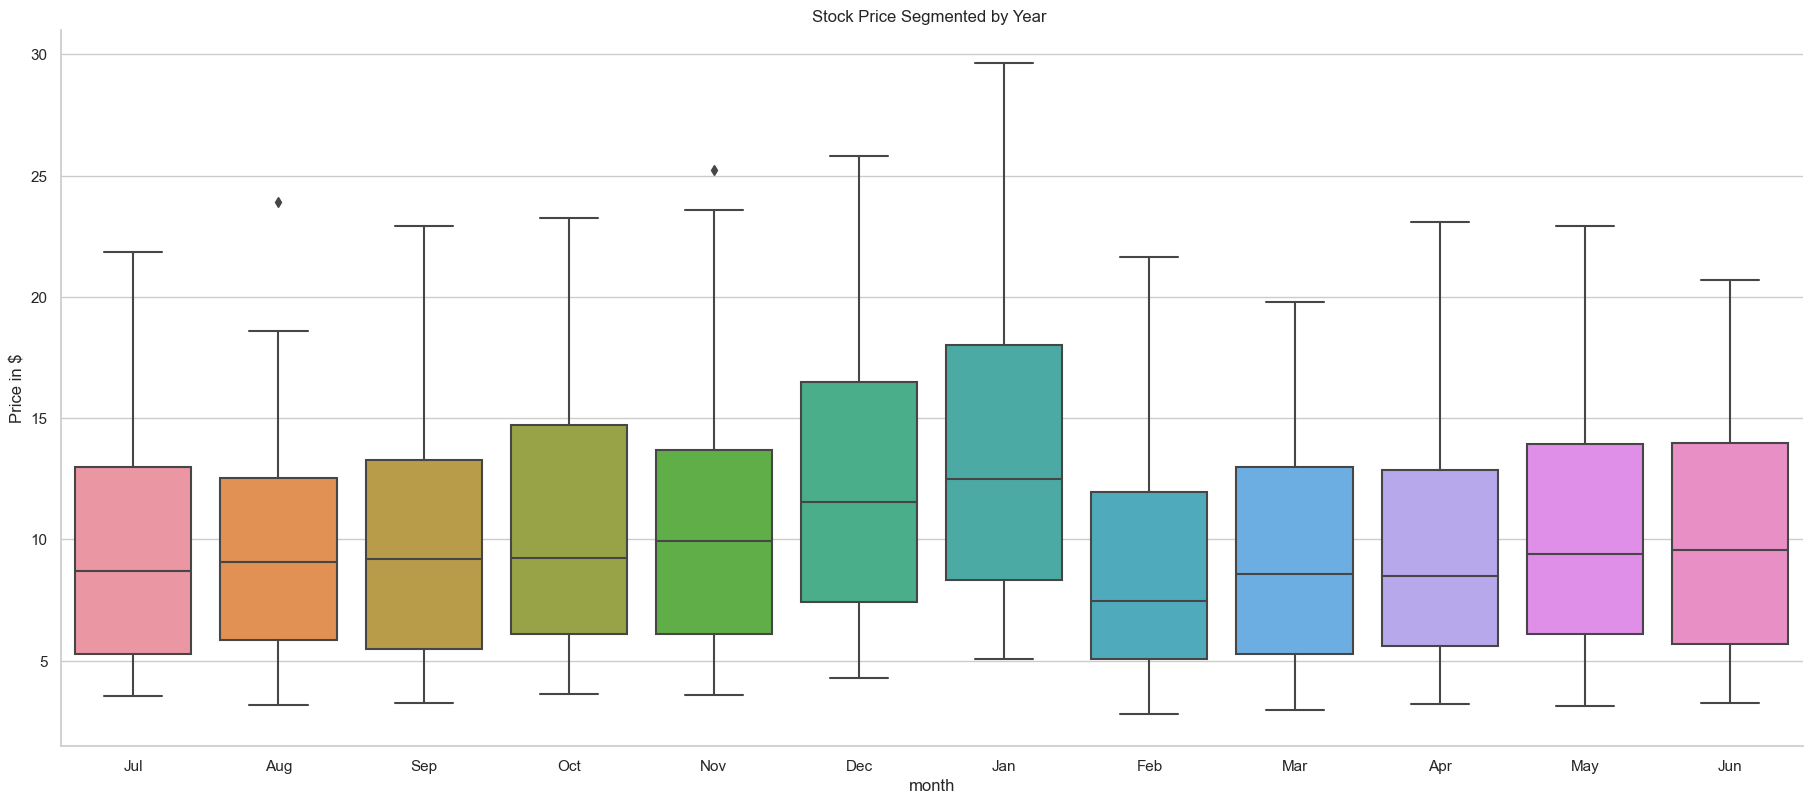

In [7]:
#Setting the size of the plot
plt.figure(figsize=(16, 7))
sns.factorplot(x="month", y="y", data=ts, kind="box", row_order=['Jan', 'Feb', 'Mar', 'Apr',
'May', 'Jun', 'Jul', 'Aug',
'Sep', 'Oct', 'Nov', 'Dec'], size=8, aspect=float(16/7))
plt.xlabel("month")
plt.ylabel("Price in $")
plt.title("Stock Price Segmented by Year ")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

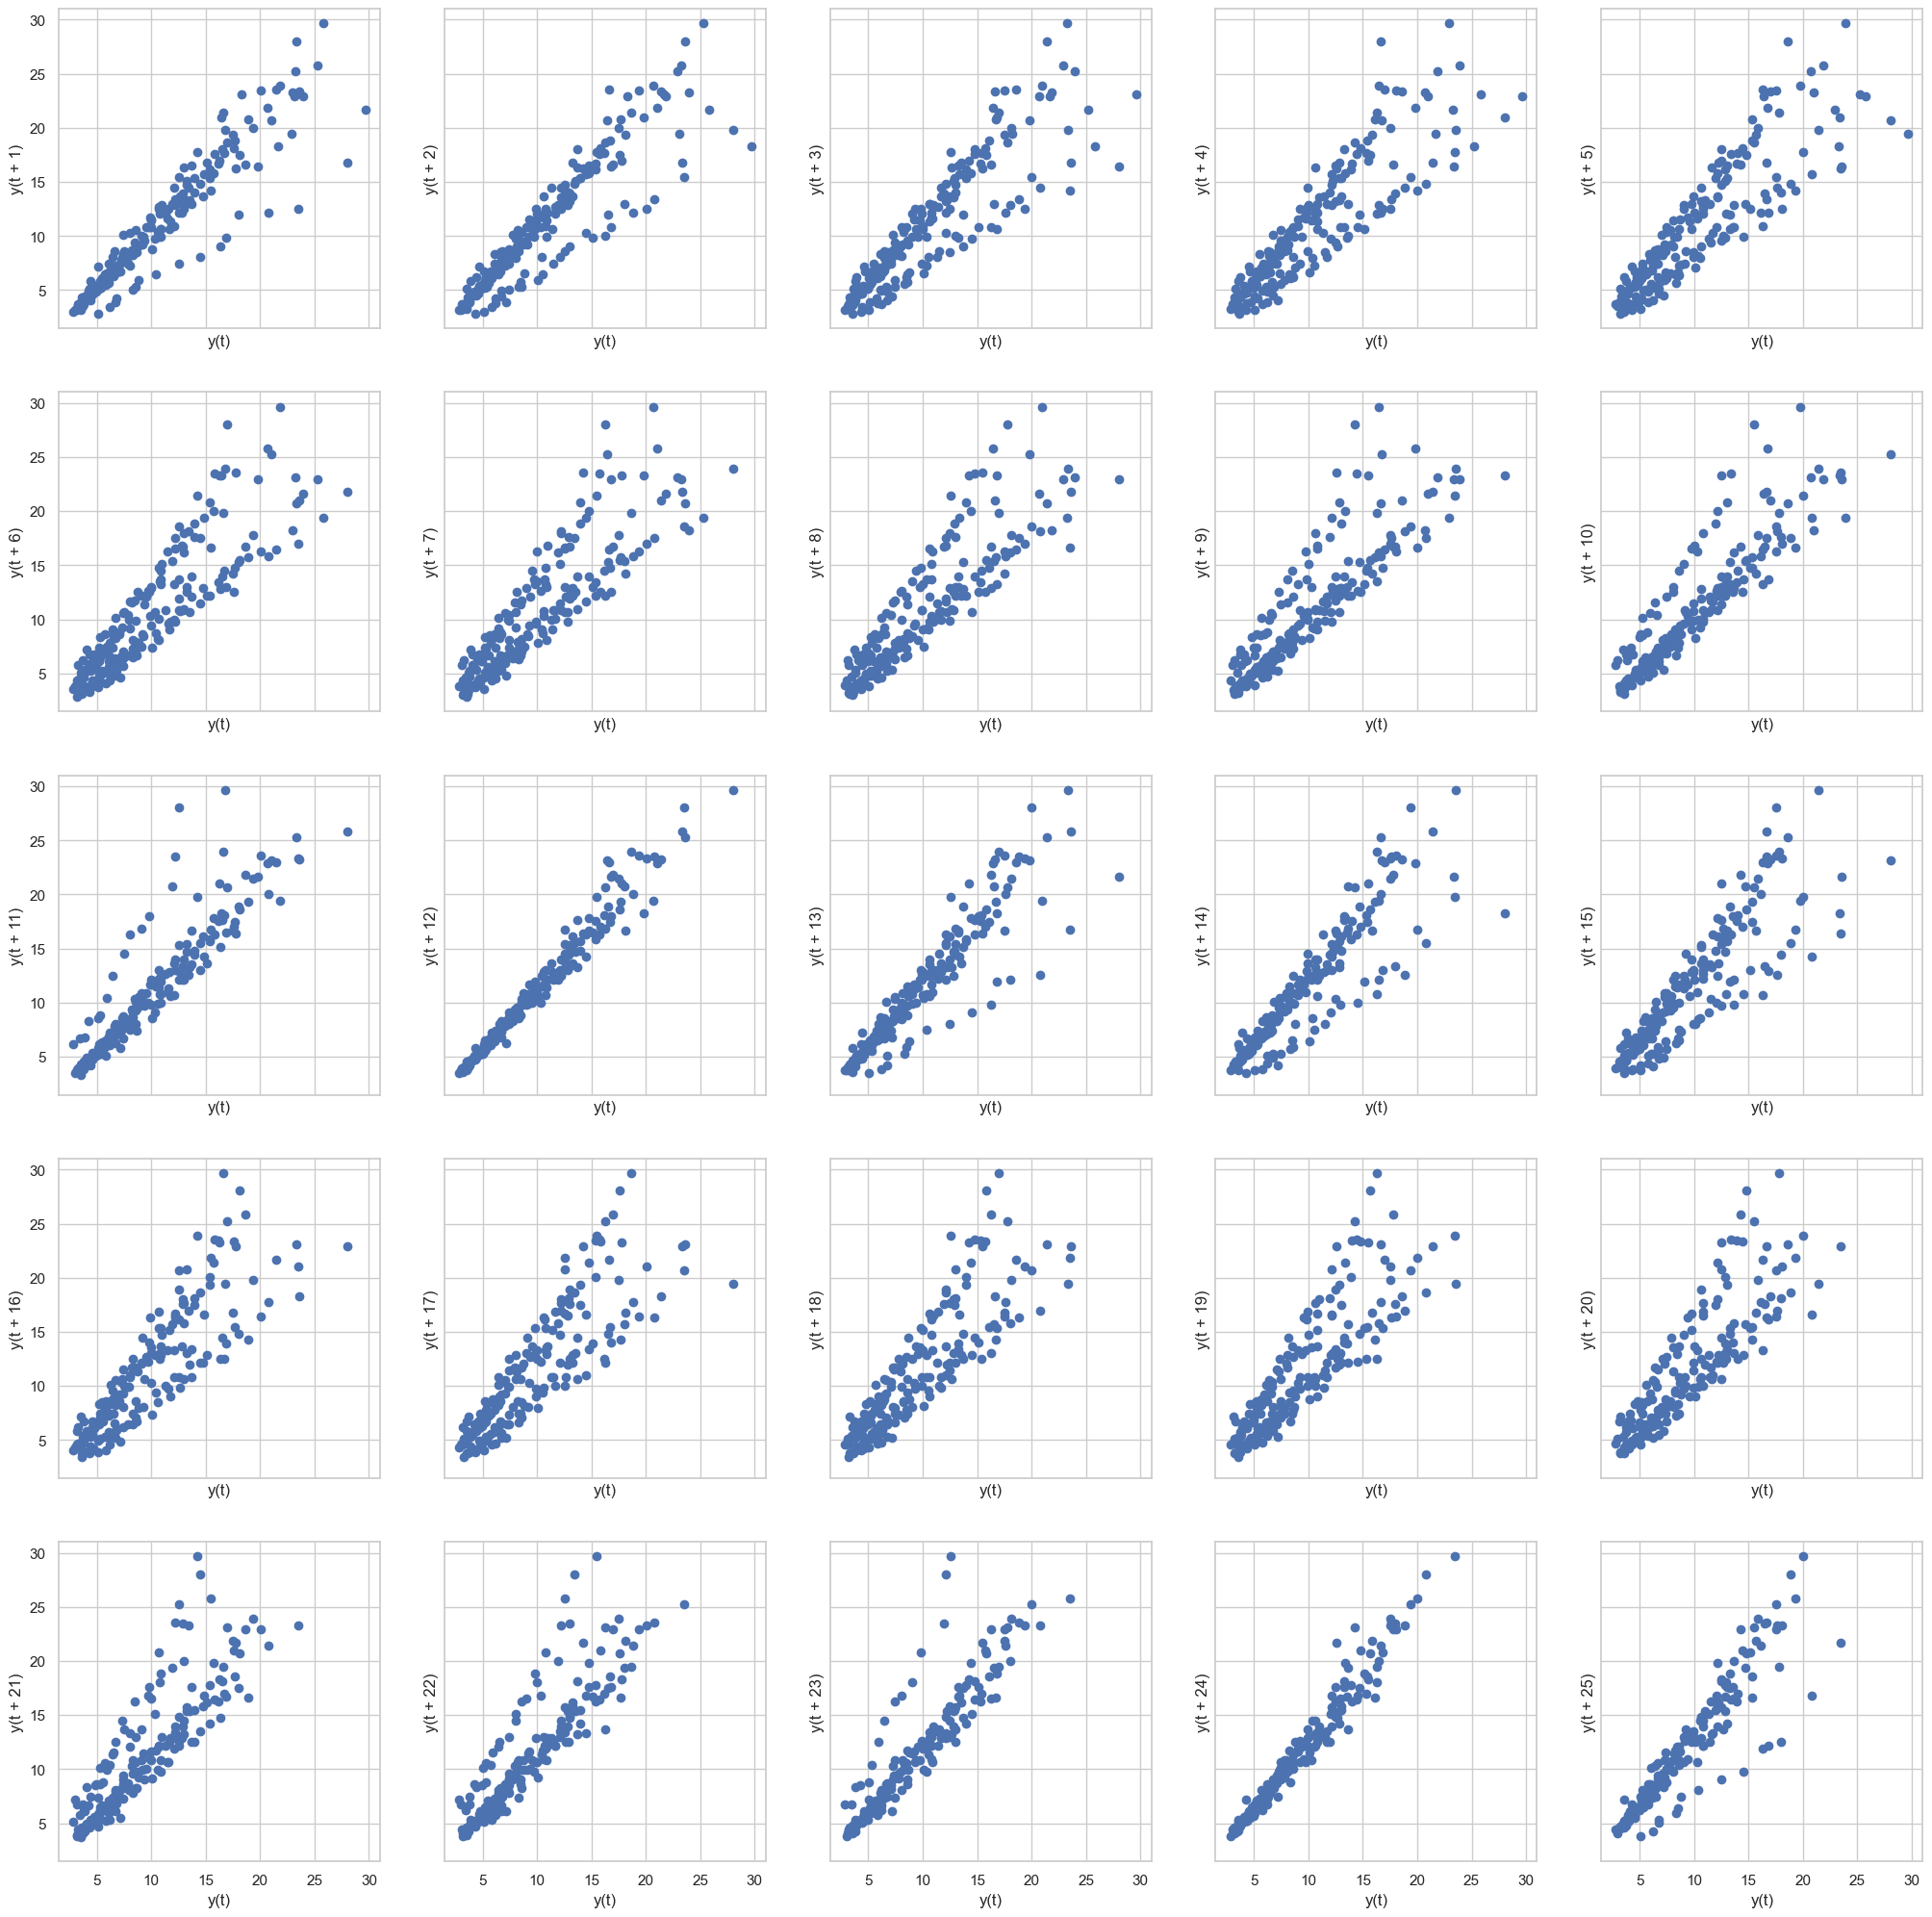

In [8]:
#Plotting 25 lag plots to determine randomness in data.
from pandas.plotting import lag_plot
plot_lags = 25
rows = int(plot_lags/5)
cols = int(plot_lags/5)
fig, axes = plt.subplots(rows, cols, sharex=True, sharey=True)
fig.set_figwidth(plot_lags)
fig.set_figheight(plot_lags)
count =1
for i in range(rows):
    for j in range(cols):
        lag_plot(ts["y"], lag=count, ax=axes[i, j])
        count+=1

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

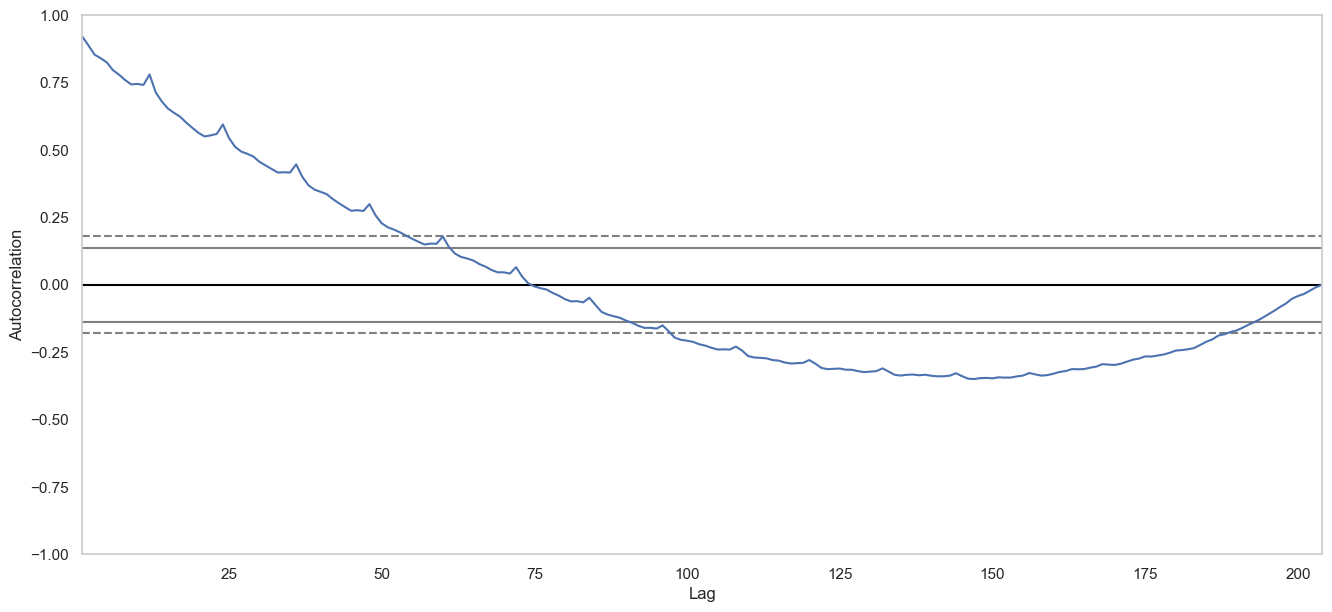

In [10]:
#Plotting graph to determine autocorrelation
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(16, 7))
autocorrelation_plot(ts["y"])

In [9]:
#Decomposing to see the white noise.
decompose = ts[["ds", "y"]]
decompose.index = ts["ds"]
decompose = decompose[["y"]]
decompose.head()

,y
ds,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


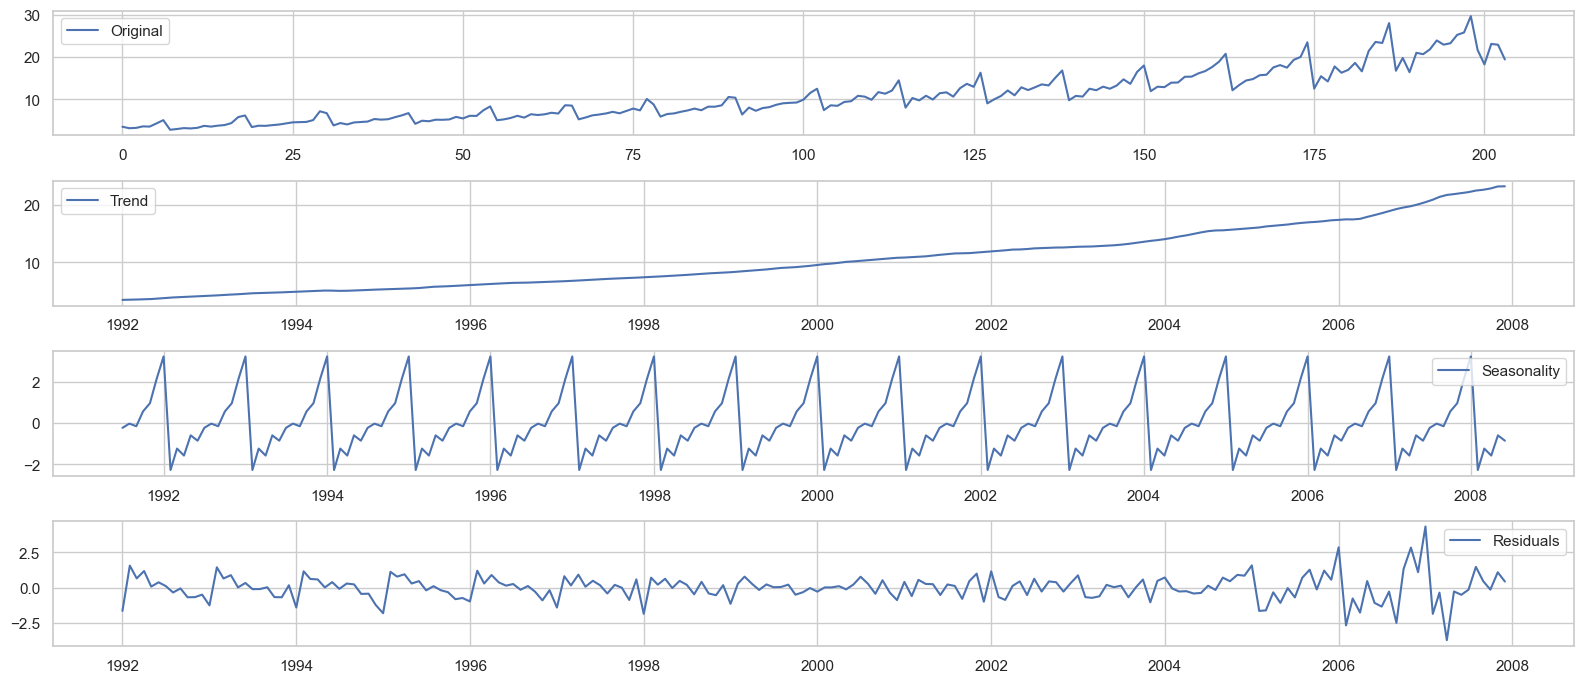

In [10]:
#Importing Decompose Model and plotting graph to see Trend, Seasonality, and Residuals
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(decompose)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(16, 7))
plt.subplot(411)
plt.plot(ts["y"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [11]:
#Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rc('xtick', labelsize=40)
matplotlib.rc('ytick', labelsize=40)
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
ts = pd.read_csv("stock_price.csv")
ts["ds"] = pd.to_datetime(ts["ds"])
print(ts.shape)
ts.head()

(204, 2)


,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [12]:
import datetime
import math
from sklearn.metrics import mean_squared_error

In [13]:
tss = pd.read_csv("stock_price.csv")
tss["ds"] = pd.to_datetime(tss["ds"])
tss.index = tss["ds"]
tss = tss[["y"]]
print(tss.shape)
print(tss.head())
x_train = tss[tss.index <datetime.datetime(2005, 1, 1, 0, 0, 0)]
x_test = tss[tss.index >=datetime.datetime(2005, 1, 1, 0, 0, 0)]
print(x_train.shape, x_test.shape)

(204, 1)
                   y
ds                  
1991-07-01  3.526591
1991-08-01  3.180891
1991-09-01  3.252221
1991-10-01  3.611003
1991-11-01  3.565869
(162, 1) (42, 1)


In [20]:
# Stationarity check
from statsmodels.tsa.stattools import adfuller
#Defining a custom function to perform Stationarity Test on the data
def stationarity_test(data):
    dftest = adfuller(data.y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    plt.figure(figsize=(16, 7))
    plt.plot(data.index, data.y)
    plt.show()

Test Statistic                  -0.660497
p-value                          0.856718
#Lags Used                      14.000000
Number of Observations Used    147.000000
Critical Value (1%)             -3.475637
Critical Value (5%)             -2.881410
Critical Value (10%)            -2.577365
dtype: float64


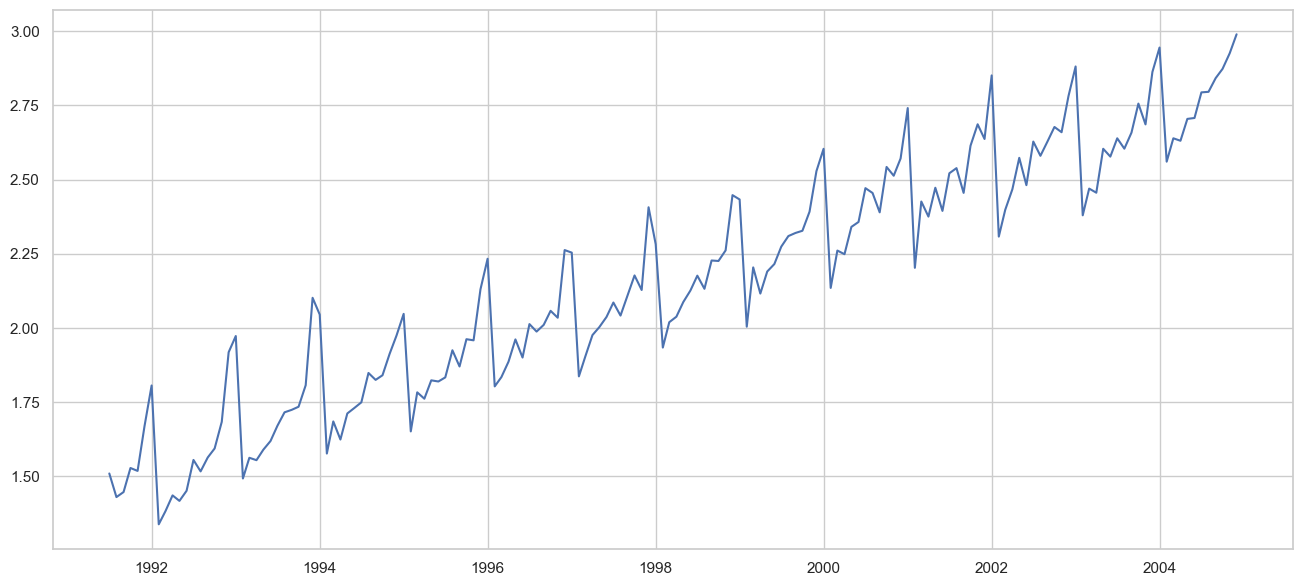

In [47]:
#Now take the log (To make variance constant) and check for stationary again
log_train = x_train
log_train = log_train["y"].apply(lambda x: math.log(x+1))
log_train = pd.DataFrame(log_train)
stationarity_test(log_train)

Test Statistic                  -4.034900
p-value                          0.001238
#Lags Used                      13.000000
Number of Observations Used    148.000000
Critical Value (1%)             -3.475325
Critical Value (5%)             -2.881275
Critical Value (10%)            -2.577293
dtype: float64


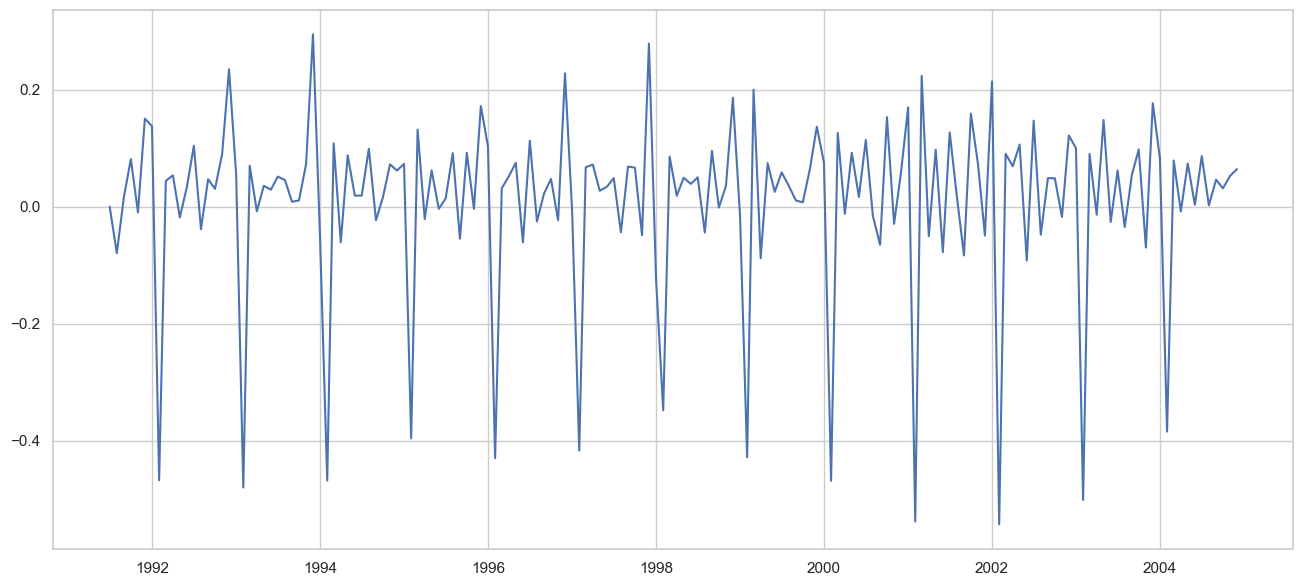

In [29]:
first_diff = log_train["y"] - log_train["y"].shift(1)
first_diff = first_diff.fillna(0)
first_diff = pd.DataFrame(first_diff)
stationarity_test(first_diff)

Test Statistic                  -5.079978
p-value                          0.000015
#Lags Used                      11.000000
Number of Observations Used    150.000000
Critical Value (1%)             -3.474715
Critical Value (5%)             -2.881009
Critical Value (10%)            -2.577151
dtype: float64


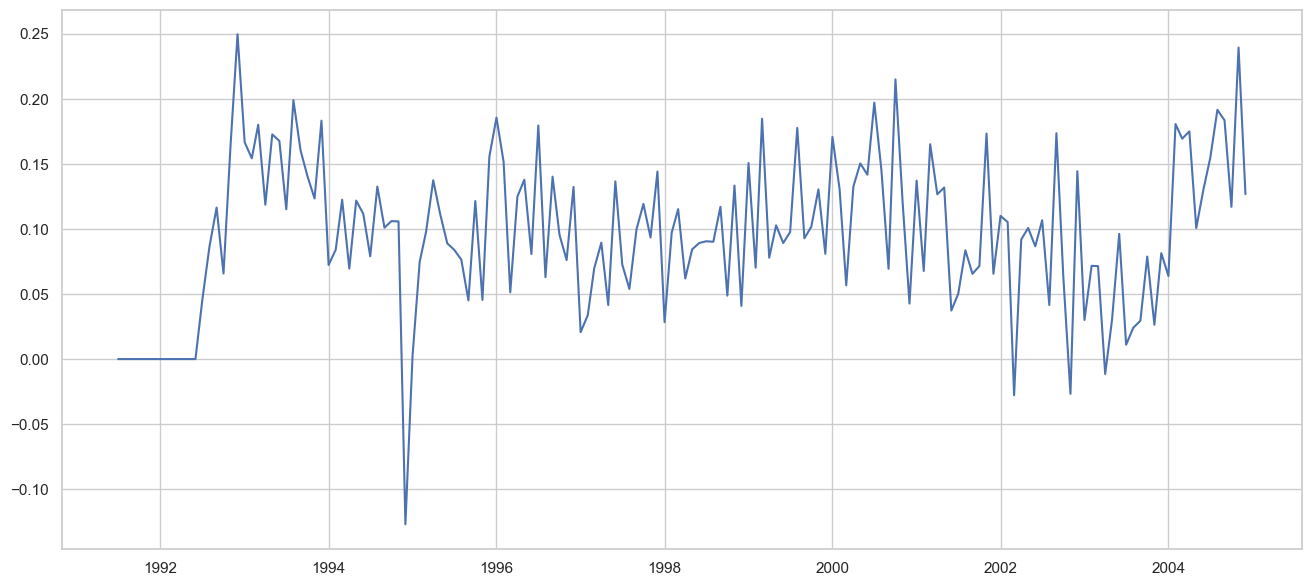

In [30]:
#Using Seasonal Differentiating for stationary check
seasonal_data_differenced = log_train["y"] - log_train["y"].shift(12)
seasonal_data_differenced = seasonal_data_differenced.fillna(0)
seasonal_data_differenced = pd.DataFrame(seasonal_data_differenced)
stationarity_test(seasonal_data_differenced)

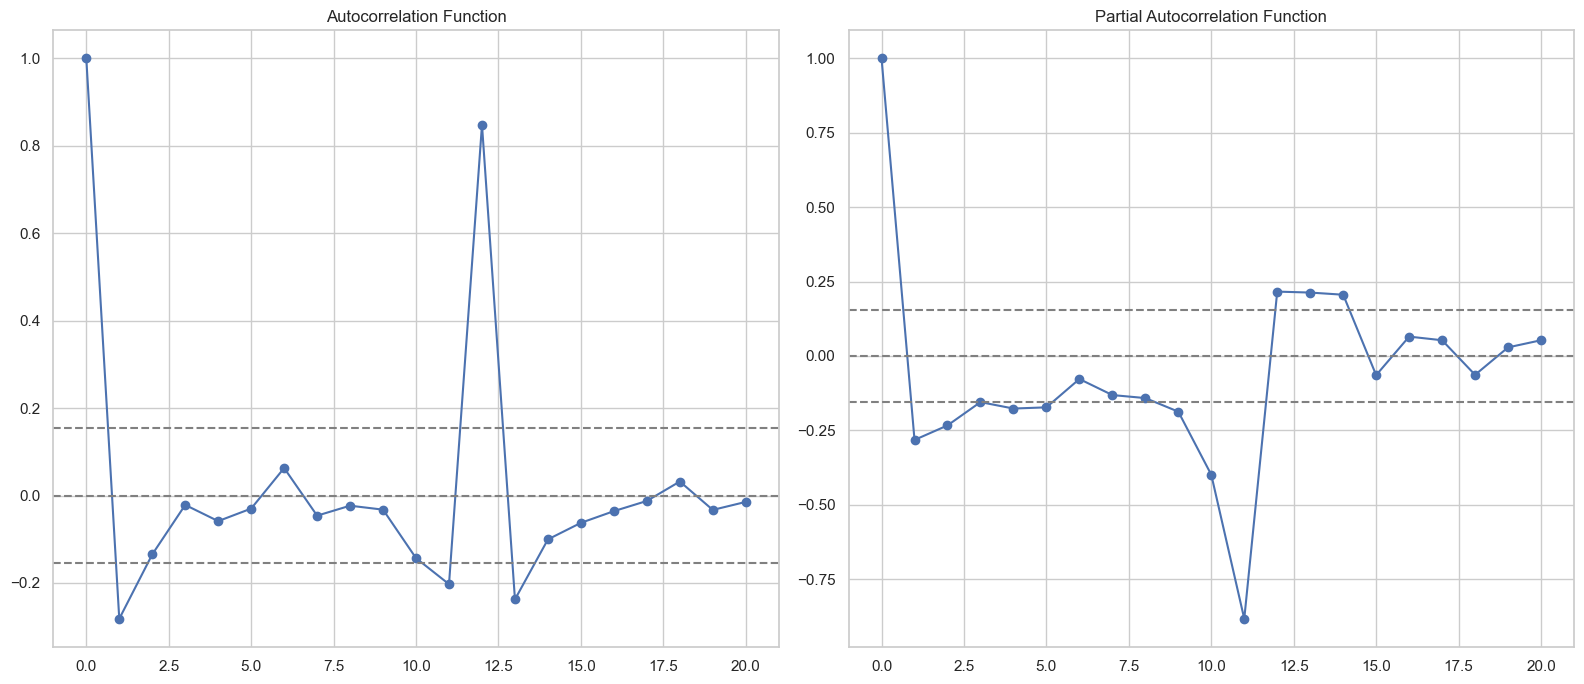

In [42]:
#Setting values for lag parameters for ACF and PACF
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(first_diff, nlags=20)
lag_pacf = pacf(first_diff, nlags=20, method='ols')
plt.figure(figsize=(16, 7))
#Plotting ACF plot:
plt.subplot(121)
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plotting PACF Plot:
plt.subplot(122)
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [36]:
#Plotting AR Model with p=1, d=1, q=0
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(log_train, order=(1, 1, 0))
results_AR = model.fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


NameError: name 'results_AR' is not defined

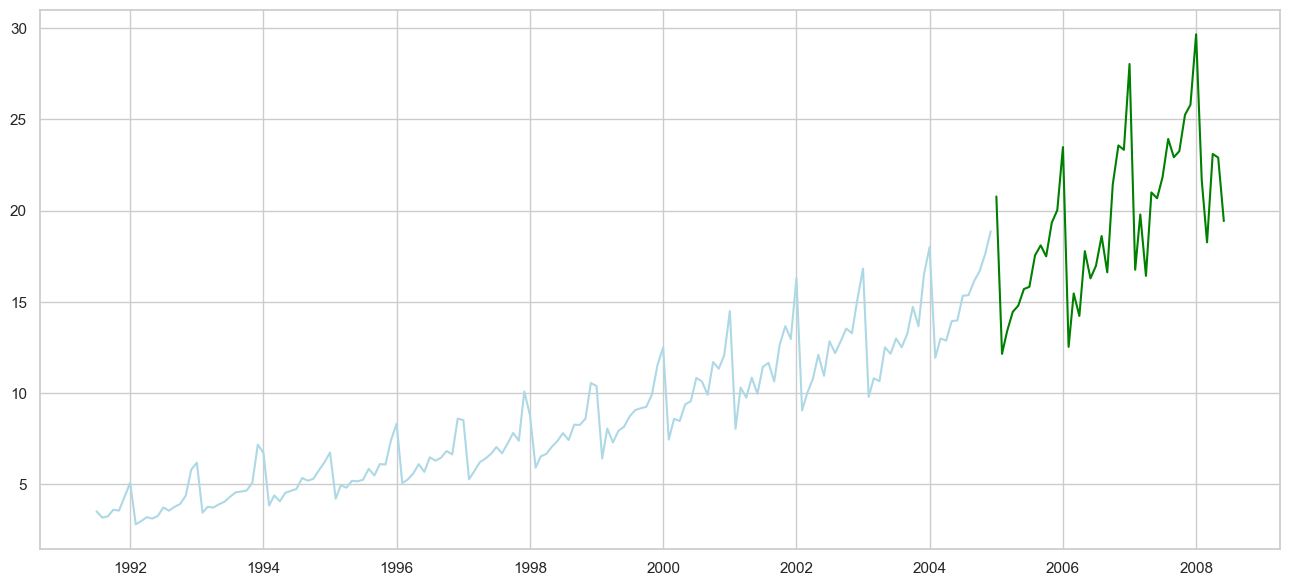

In [22]:
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green")
#Code for checking Forecasting
pred = pd.DataFrame(results_AR.forecast(len(x_test))[-1])
pred.columns = ["yhat"]
pred.index = x_test.index
#Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)
#Code for Measuring error.
measure = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ValueError: DataFrame constructor not properly called!

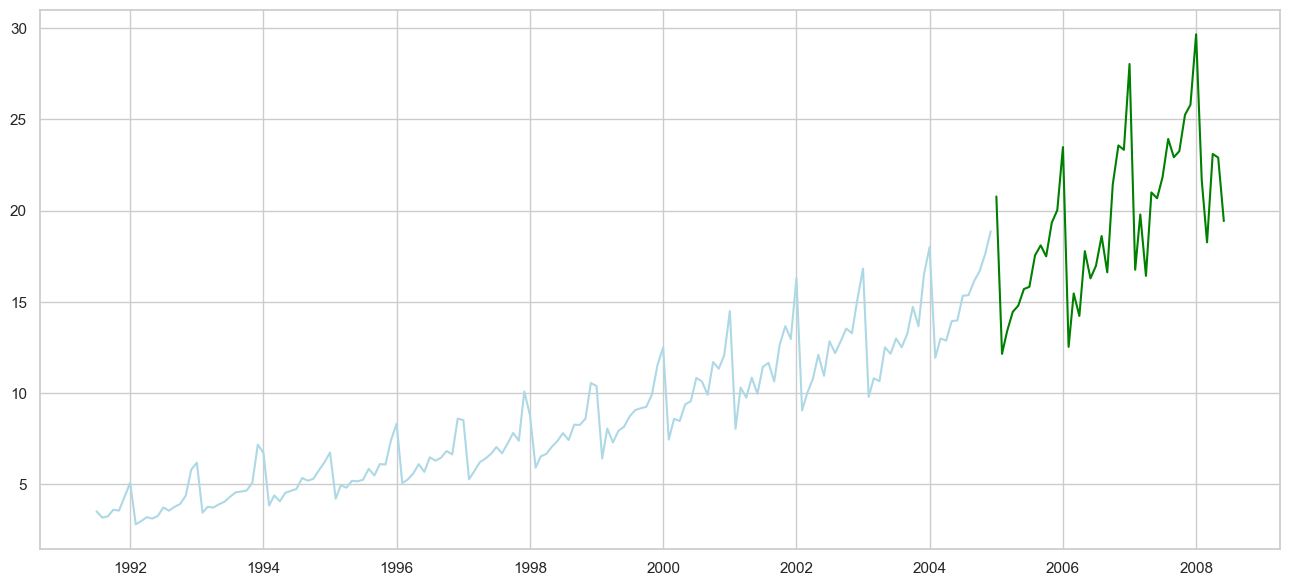

In [40]:
#Plotting MA Model with p=0, d=1, q=1
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(log_train, order=(0, 1, 1))
results_MA = model.fit()
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green")
#Code for checking Forecasting
pred = pd.DataFrame(results_MA.forecast(len(x_test))[0])
pred.columns = ["yhat"]
pred.index = x_test.index
#Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)
#Code for Measuring error.
measure = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  162
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  89.800
Date:                Sat, 20 May 2023   AIC                           -173.601
Time:                        12:22:43   BIC                           -164.357
Sample:                    07-01-1991   HQIC                          -169.847
                         - 12-01-2004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3484      0.195      1.783      0.075      -0.035       0.731
ma.L1         -0.8316      0.104     -7.979      0.000      -1.036      -0.627
sigma2         0.0191      0.002      9.459      0.0

ValueError: DataFrame constructor not properly called!

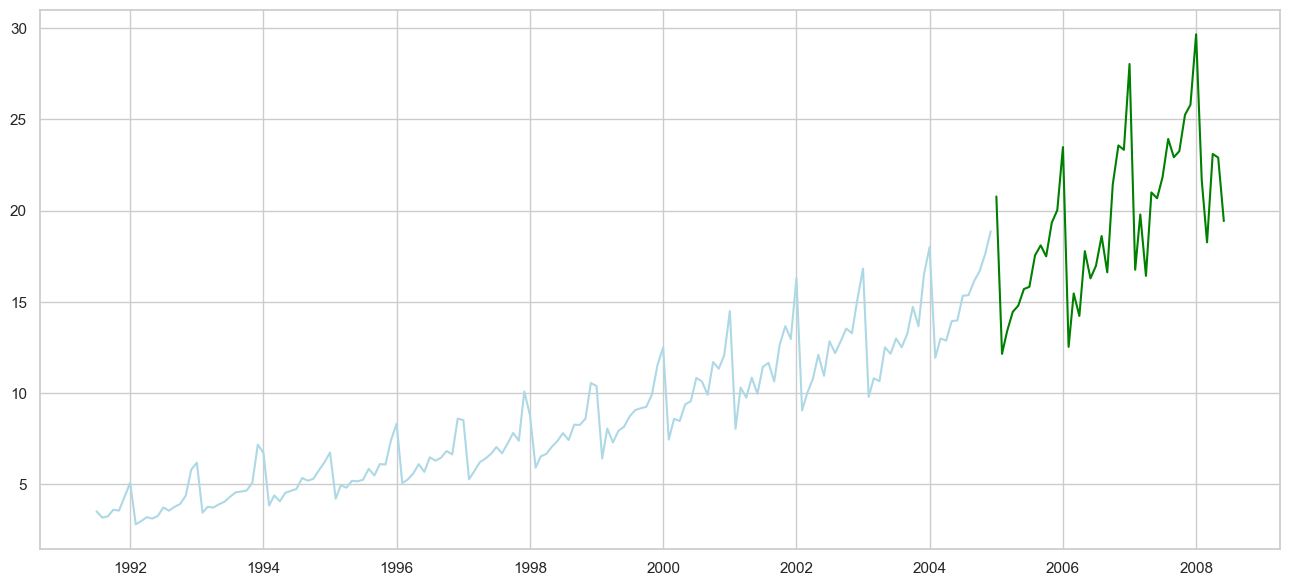

In [41]:
#Using both AR and MA with differencing and applying ARIMA Model with p=1, d=1, q=1
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(log_train, order=(1, 1, 1))
results_ARIMA = model.fit()
print(results_ARIMA.summary())
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green")
#Code for checking Forecasting
pred = pd.DataFrame(results_ARIMA.forecast(len(x_test))[0])
pred.columns = ["yhat"]
pred.index = x_test.index
#Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)
#Code for Measuring error.
measure = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()